In [1]:
import soundfile as sf
import numpy as np
from scipy import stats
import matplotlib as plt
import torch
from fairseq.models.wav2vec import Wav2VecdecoderModel, Wav2VecAutoEncoderModel

In [192]:
import soundfile as sf
import numpy as np
from scipy import stats
import matplotlib as plt

# fname = '/home/thn/audio_dataset/LibriSpeech/dev-other/116/288045/116-288045-0000.flac'
fname = '/home/thn/audio_dataset/LibriSpeech/dev-clean/174/50561/174-50561-0002.flac' # user 3

wav, curr_sample_rate = sf.read(fname)
# feats = torch.from_numpy(wav).float()
wav_t = wav *5 /3 + 0.5
source = torch.from_numpy(wav).float().view(1, -1)

## load audio

In [340]:
import soundfile as sf
import numpy as np
from scipy import stats
import matplotlib as plt

# fname = '/home/thn/audio_dataset/LibriSpeech/dev-other/116/288045/116-288045-0000.flac'
fname = '/home/thn/audio_dataset/LibriSpeech/dev-clean/174/50561/174-50561-0000.flac'

wav, curr_sample_rate = sf.read(fname)
# feats = torch.from_numpy(wav).float()
wav_t = wav *5 /3 + 0.5
source = torch.from_numpy(wav).float().view(1, -1)

### Local 1 model

In [282]:
# ./w2v_thn/decoder/0118like_en_arch/checkpoint_last.pt
# './w2v_thn/0119_big_lr/checkpoint_best.pt'
# './w2v_thn/decoder/0119_big_lr_small_sample/checkpoint_last.pt'
# cp = torch.load('./w2v_thn/decoder/0221_1_act_tanh_time_div4_feat8_6dB_MSE/checkpoint_best.pt')


# PATH = './w2v_thn/FL_AutoEncoder/0728_tdiv1_feat8_6dB_NR_local1P/checkpoint_best.pt'
PATH = './w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local1P_redo/checkpoint_last.pt'
cp1 = torch.load(PATH)

model1 = Wav2VecAutoEncoderModel.build_model(cp1['cfg']['model'], task=None)
model1.load_state_dict(cp1['model'])
# model1.eval() # show model setting
 

<All keys matched successfully>

## Local2 model

In [283]:

cp2 = torch.load('./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local2P_redo/checkpoint_best.pt')

model2 = Wav2VecAutoEncoderModel.build_model(cp2['cfg']['model'], task=None)
model2.load_state_dict(cp2['model'])
# model.eval()


<All keys matched successfully>

### T model

In [648]:
PATH = './w2v_thn/FL_AutoEncoder/0801_tdiv1_feat8_6dB_NR_l2tol1_TL/checkpoint_best.pt'
cp_t = torch.load(PATH)

model = Wav2VecAutoEncoderModel.build_model(cp_t['cfg']['model'], task=None)
model.load_state_dict(cp_t['model'])


<All keys matched successfully>

### Empty Model

In [43]:

# cp = torch.load('./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local2P/checkpoint_best.pt')

model = Wav2VecAutoEncoderModel.build_model(cp1['cfg']['model'], task=None)
# model.load_state_dict(cp['model'])
# model.eval()


In [ ]:
model.feature_aggregator

In [32]:
l_keys = cp1['model'].keys()

In [ ]:
feature_extractor*

## Save model

In [331]:
#  First load a initialized model and then save the transfered model
TL_PATH = './w2v_thn/FL_AutoEncoder/0801_tdiv1_feat8_6dB_NR_l2tol1_TL/checkpoint_last.pt'
cp_temp = torch.load(TL_PATH)
comb_ch_encoder(cp_temp['model'], cp2['model'])
torch.save(cp_temp, TL_PATH) 

In [ ]:
cp1['model']

In [ ]:
cp_temp['model']['feature_aggregator.conv_layers.0.1.weight']

In [312]:
cp_temp['extra_state']['train_iterator']['epoch']

1

In [16]:
def comb_ch_encoder(base_w, imported_w):
    combed_w = comb_weights(base_w, imported_w, 'feature_aggregator')
#     print(combed_w)
    combed_w = comb_weights(base_w, imported_w, 'feature_aggregator_en')
#     return combed_w

def comb_weights(base_w, imported_w, module_name):  
    l_keys = base_w.keys()
    for i in l_keys:
        ii = i.split('.')
        if ii[0] == module_name: 
            base_w[i] = imported_w[i]
    return base_w
    # model_para=cp1['model'][i]
    

In [284]:
combed_w = comb_ch_encoder(cp1['model'], cp2['model'])

In [64]:
combed_w = comb_weights(cp1['model'], cp2['model'], 'feature_aggregator')
combed_w = comb_weights(cp1['model'], cp2['model'], 'feature_aggregator_en')

In [ ]:

# cp = torch.load('./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local2P/checkpoint_best.pt')

model = Wav2VecAutoEncoderModel.build_model(cp1['cfg']['model'], task=None)
# model.load_state_dict(cp['model'])
model.load_state_dict(combed_w)
model.eval()


In [ ]:
combed_w

In [ ]:
combed_w = comb_weights(cp1['model'], cp2['model'], 'feature_aggregator')

In [ ]:
model.load_state_dict(combed_w)
model.eval()

In [67]:
combed_w.keys()

odict_keys(['feature_extractor.conv_layers.0.0.weight', 'feature_extractor.conv_layers.0.2.weight', 'feature_extractor.conv_layers.0.2.bias', 'feature_extractor.conv_layers.1.0.weight', 'feature_extractor.conv_layers.1.2.weight', 'feature_extractor.conv_layers.1.2.bias', 'feature_extractor.conv_layers.2.0.weight', 'feature_extractor.conv_layers.2.2.weight', 'feature_extractor.conv_layers.2.2.bias', 'feature_extractor.conv_layers.3.0.weight', 'feature_aggregator.conv_layers.0.1.weight', 'feature_aggregator.conv_layers.0.1.bias', 'feature_aggregator.conv_layers.0.3.weight', 'feature_aggregator.conv_layers.0.3.bias', 'feature_aggregator.conv_layers.1.1.weight', 'feature_aggregator.conv_layers.1.1.bias', 'feature_aggregator.conv_layers.1.3.weight', 'feature_aggregator.conv_layers.1.3.bias', 'feature_aggregator.conv_layers.2.1.weight', 'feature_aggregator.conv_layers.2.1.bias', 'feature_aggregator.conv_layers.2.3.weight', 'feature_aggregator.conv_layers.2.3.bias', 'feature_aggregator.conv_l

In [ ]:
combed_w['feature_aggregator.conv_layers.0.1.weight']

In [ ]:
cp1['model']['feature_extractor.conv_layers.0.0.weight']

In [ ]:
cp2['model']['feature_aggregator.conv_layers.0.1.weight']

In [ ]:
model.load_state_dict(model_para)

### Local model 1

In [213]:
# Encoder, Transmitter 
source_ = source 
T_a = model1.feature_extractor_en(source_)
T_a_ = model1.dropout_feats_en(T_a)
print("|*****T_a_S:|", T_a_.shape)
X = model1.feature_aggregator_en(T_a_)
X = model1.dropout_agg_en(X)
print("|*******X_S:|", X.shape)

# Channel layer

import math
import numpy as np
SNR = 14 # dB # SNR = 10 log（s/n） = 6
P_noise = 0.2 /math.sqrt(10**(SNR/10))
P_noise = torch.tensor(P_noise).half()
# [r1,r2,r3] = X.shape 
# noise = np.random.randn(r1,r2,r3)
noise = torch.randn(X.shape).half()

# fading = torch.randn(X.shape).half()
# fading = fading * 0.1 + 0.8


# print(X.type(), torch.from_numpy(noise).float().cuda().type(), P_noise.type())
# Y = X + torch.from_numpy(noise).half().cuda() * P_noise.cuda()


# Y = fading.mul(X) + noise * P_noise
Y = X + noise * P_noise


# —————————— No Noise Channel ————————-
# Y  = X

# ——————————  Decoder, Receiver ———————
print("In the Channel Y_S", Y.shape)
features = model1.feature_aggregator(Y)
# x = self.dropout_agg(feature)

features_ = model1.dropout_agg(features)
x = model1.feature_extractor(features_)
print("|in decoder model1, out feature_extractor|", x.shape)
x_ = model1.dropout_feats(x)
# x_ = x_ - 1

|*****T_a_S:| torch.Size([1, 8, 34316])
|*******X_S:| torch.Size([1, 8, 34316])
In the Channel Y_S torch.Size([1, 8, 34316])
|in decoder model1, out feature_extractor| torch.Size([1, 1, 34320])


In [214]:
MSE(x_, source_)

output, source, minlen= 34320 34320 34320
1.89998682e-04


'1.89998682e-04'

### Tmodel

In [713]:
res = []
for i in range(20):
    # Encoder, Transmitter 
    source_ = source 
    T_a = model.feature_extractor_en(source_)
    T_a_ = model.dropout_feats_en(T_a)
#     print("|*****T_a_S:|", T_a_.shape)
    X = model.feature_aggregator_en(T_a_)
    X = model.dropout_agg_en(X)
#     print("|*******X_S:|", X.shape)

    # Channel layer

    import math
    import numpy as np
    SNR = 10 # dB # SNR = 10 log（s/n） = 6
    P_noise = 0.2 /math.sqrt(10**(SNR/10))
    P_noise = torch.tensor(P_noise).half()
    # [r1,r2,r3] = X.shape 
    # noise = np.random.randn(r1,r2,r3)
    noise = torch.randn(X.shape).half()

    fading = torch.randn(X.shape).half()
    fading = fading * 0.1 + 0.8


    # print(X.type(), torch.from_numpy(noise).float().cuda().type(), P_noise.type())
    # Y = X + torch.from_numpy(noise).half().cuda() * P_noise.cuda()
    Y = X + noise * P_noise

    # —————————— No Noise Channel ————————-
    # Y  = X

    # ——————————  Decoder, Receiver ———————
#     print("In the Channel Y_S", Y.shape)
    features = model.feature_aggregator(Y)
    # x = self.dropout_agg(feature)

    features_ = model.dropout_agg(features)
    x = model.feature_extractor(features_)
#     print("|in decoder model, out feature_extractor|", x.shape)
    x_ = model.dropout_feats(x)
    res.append(MSE(x_ * 0.65, source_))
    


output, source, minlen= 64320 64320 64320
1.77291295e-04
output, source, minlen= 64320 64320 64320
1.73630775e-04
output, source, minlen= 64320 64320 64320
1.75957306e-04
output, source, minlen= 64320 64320 64320
1.74094079e-04
output, source, minlen= 64320 64320 64320
1.74271976e-04
output, source, minlen= 64320 64320 64320
1.74790082e-04
output, source, minlen= 64320 64320 64320
1.76379268e-04
output, source, minlen= 64320 64320 64320
1.74084242e-04
output, source, minlen= 64320 64320 64320
1.71452033e-04
output, source, minlen= 64320 64320 64320
1.75350477e-04
output, source, minlen= 64320 64320 64320
1.78749659e-04
output, source, minlen= 64320 64320 64320
1.74971254e-04
output, source, minlen= 64320 64320 64320
1.76476009e-04
output, source, minlen= 64320 64320 64320
1.75812500e-04
output, source, minlen= 64320 64320 64320
1.74921690e-04
output, source, minlen= 64320 64320 64320
1.74369765e-04
output, source, minlen= 64320 64320 64320
1.77183698e-04
output, source, minlen= 64320 6

In [714]:
sum = 0 
for j in res:
    sum += float(j)
average = sum / 20
print("%.8e"%average)

1.75010134e-04


In [684]:
# Transformed Model
MSE(x_*0.66, source_)

output, source, minlen= 64320 64320 64320
2.89019226e-04


/home/titan/anaconda3/envs/thn/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


'2.89019226e-04'

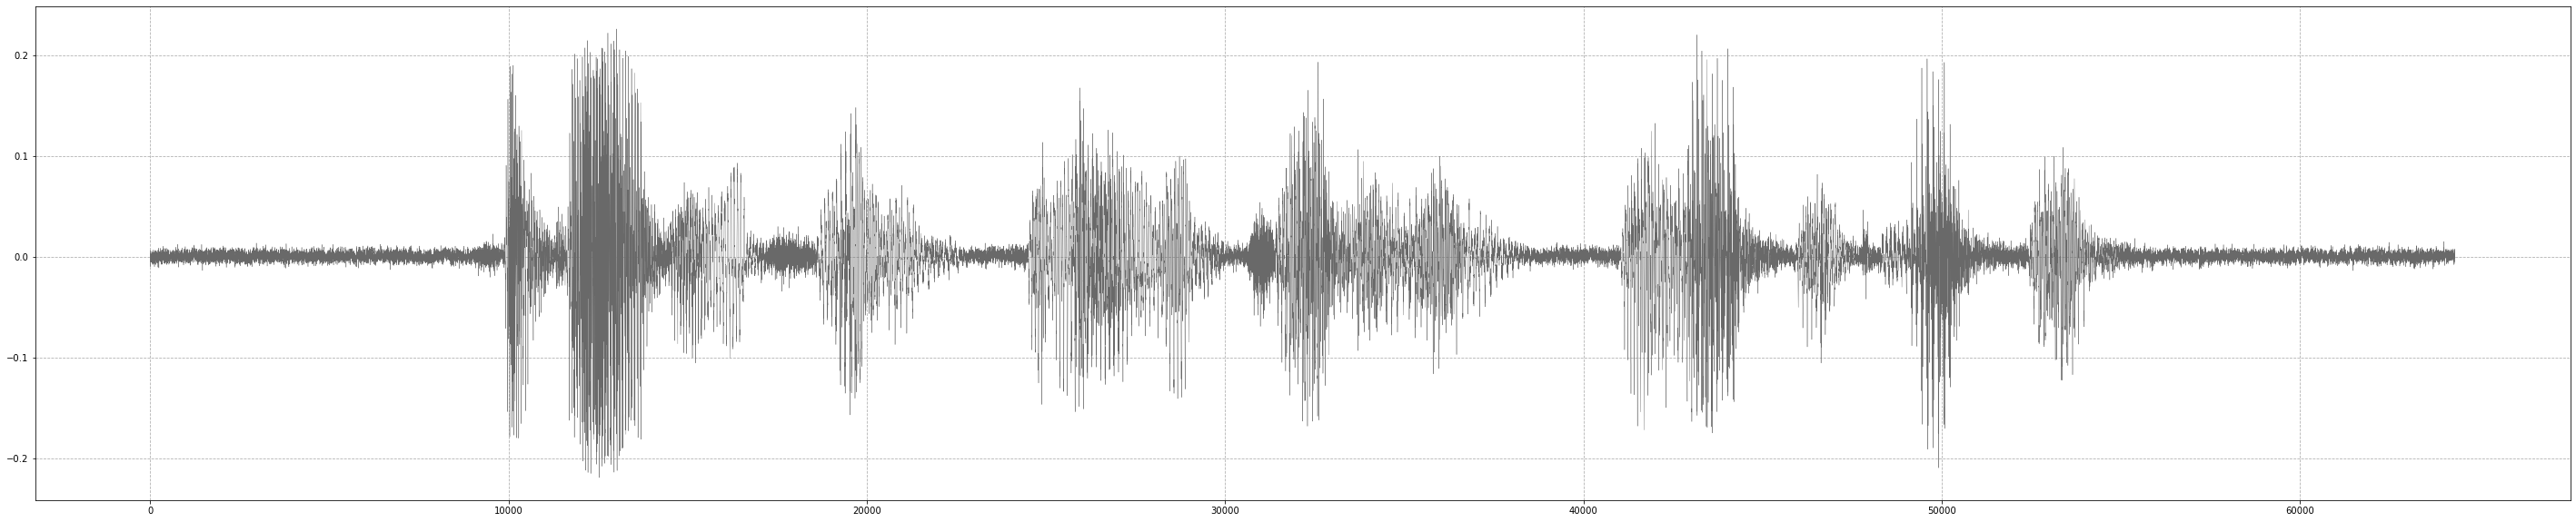

In [689]:
plot_curve(((x_*0.65).view(-1)).detach().numpy())    # original output

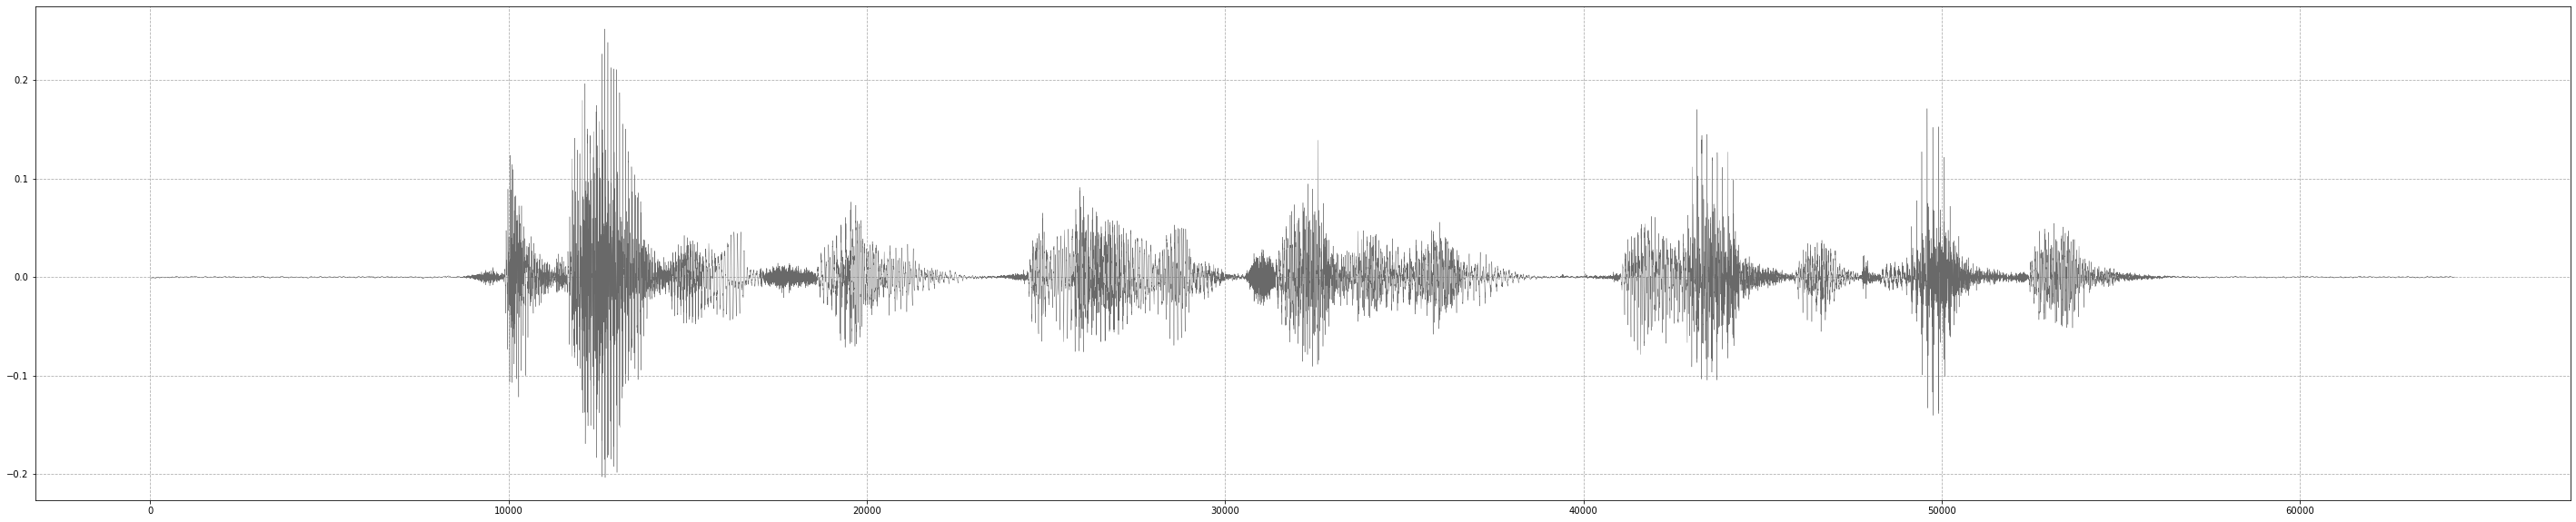

In [652]:
plot_curve(((source).view(-1)).detach().numpy())    # original output

### Local Model 2

In [251]:
# Encoder, Transmitter 
source_ = source 
T_a = model2.feature_extractor_en(source_)
T_a_ = model2.dropout_feats_en(T_a)
print("|*****T_a_S:|", T_a_.shape)
X = model2.feature_aggregator_en(T_a_)
X = model2.dropout_agg_en(X)
print("|*******X_S:|", X.shape)

# Channel layer

import math
import numpy as np
SNR = 14 # dB # SNR = 10 log（s/n） = 6
P_noise = 0.2 /math.sqrt(10**(SNR/10))
P_noise = torch.tensor(P_noise).half()
# [r1,r2,r3] = X.shape 
# noise = np.random.randn(r1,r2,r3)
noise = torch.randn(X.shape).half()

# fading = torch.randn(X.shape).half()
# fading = fading * 0.1 + 0.8


# print(X.type(), torch.from_numpy(noise).float().cuda().type(), P_noise.type())
# Y = X + torch.from_numpy(noise).half().cuda() * P_noise.cuda()

# Y = fading.mul(X) + noise * P_noise
Y = X + noise * P_noise


# —————————— No Noise Channel ————————-
# Y  = X

# ——————————  Decoder, Receiver ———————
print("In the Channel Y_S", Y.shape)
features = model2.feature_aggregator(Y)
# x = self.dropout_agg(feature)

features_ = model2.dropout_agg(features)
x = model2.feature_extractor(features_)
print("|in decoder model2, out feature_extractor|", x.shape)
x_ = model2.dropout_feats(x)


|*****T_a_S:| torch.Size([1, 8, 34316])
|*******X_S:| torch.Size([1, 8, 34316])
In the Channel Y_S torch.Size([1, 8, 34316])
|in decoder model2, out feature_extractor| torch.Size([1, 1, 34320])


In [252]:
# local model 2
MSE(x_ * 0.9, source_)

output, source, minlen= 34320 34320 34320
1.85127326e-04


'1.85127326e-04'

### Distribute FL model ( Agg after lcoal learned)

In [200]:
def fl_two(m1: str, m2:str):
    cp1 = torch.load(m1)
    cp2 = torch.load(m2)
    model1 = Wav2VecAutoEncoderModel.build_model(cp1['cfg']['model'], task=None)
    model2 = Wav2VecAutoEncoderModel.build_model(cp2['cfg']['model'], task=None)
    
    para1 = cp1['model']
    para2 = cp2['model']
    
    for key in para1.keys():
        para1[key] = (para1[key] + para2[key]) / 2
    
    cp3 = cp1
    cp3['model'] = para1
    
    model = Wav2VecAutoEncoderModel.build_model(cp1['cfg']['model'], task=None)
    return model
    

In [202]:
model_FLed = fl_two('./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local1P_redo/checkpoint_best.pt', \
                   './w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local2P_redo/checkpoint_best.pt')

In [ ]:
./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local1P_redo/checkpoint_best.pt
./w2v_thn/FL_AutoEncoder/0303_tdiv1_feat8_6dB_NR_local2P_redo/checkpoint_best.pt


In [210]:
# Encoder, Transmitter 
source_ = source 
T_a = model_FLed.feature_extractor_en(source_)
T_a_ = model_FLed.dropout_feats_en(T_a)
print("|*****T_a_S:|", T_a_.shape)
X = model_FLed.feature_aggregator_en(T_a_)
X = model_FLed.dropout_agg_en(X)
print("|*******X_S:|", X.shape)

# Channel layer

import math
import numpy as np
SNR = 0 # dB # SNR = 10 log（s/n） = 6
P_noise = 0.2 /math.sqrt(10**(SNR/10))
P_noise = torch.tensor(P_noise).half()
# [r1,r2,r3] = X.shape 
# noise = np.random.randn(r1,r2,r3)
noise = torch.randn(X.shape).half()

# fading = torch.randn(X.shape).half()
# fading = fading * 0.1 + 0.8


# print(X.type(), torch.from_numpy(noise).float().cuda().type(), P_noise.type())
# Y = X + torch.from_numpy(noise).half().cuda() * P_noise.cuda()

# Y = fading.mul(X) + noise * P_noise
Y = X + noise * P_noise


# —————————— No Noise Channel ————————-
# Y  = X

# ——————————  Decoder, Receiver ———————
print("In the Channel Y_S", Y.shape)
features = model_FLed.feature_aggregator(Y)
# x = self.dropout_agg(feature)

features_ = model_FLed.dropout_agg(features)
x = model_FLed.feature_extractor(features_)
print("|in decoder model_FLed, out feature_extractor|", x.shape)
x_ = model_FLed.dropout_feats(x)
# x_ = x_ - 1

|*****T_a_S:| torch.Size([1, 8, 34316])
|*******X_S:| torch.Size([1, 8, 34316])
In the Channel Y_S torch.Size([1, 8, 34316])
|in decoder model_FLed, out feature_extractor| torch.Size([1, 1, 34320])


In [212]:
# Distributed Learning
MSE(x_, source_)

output, source, minlen= 34320 34320 34320
4.68418896e-01


/home/titan/anaconda3/envs/thn/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


'4.68418896e-01'

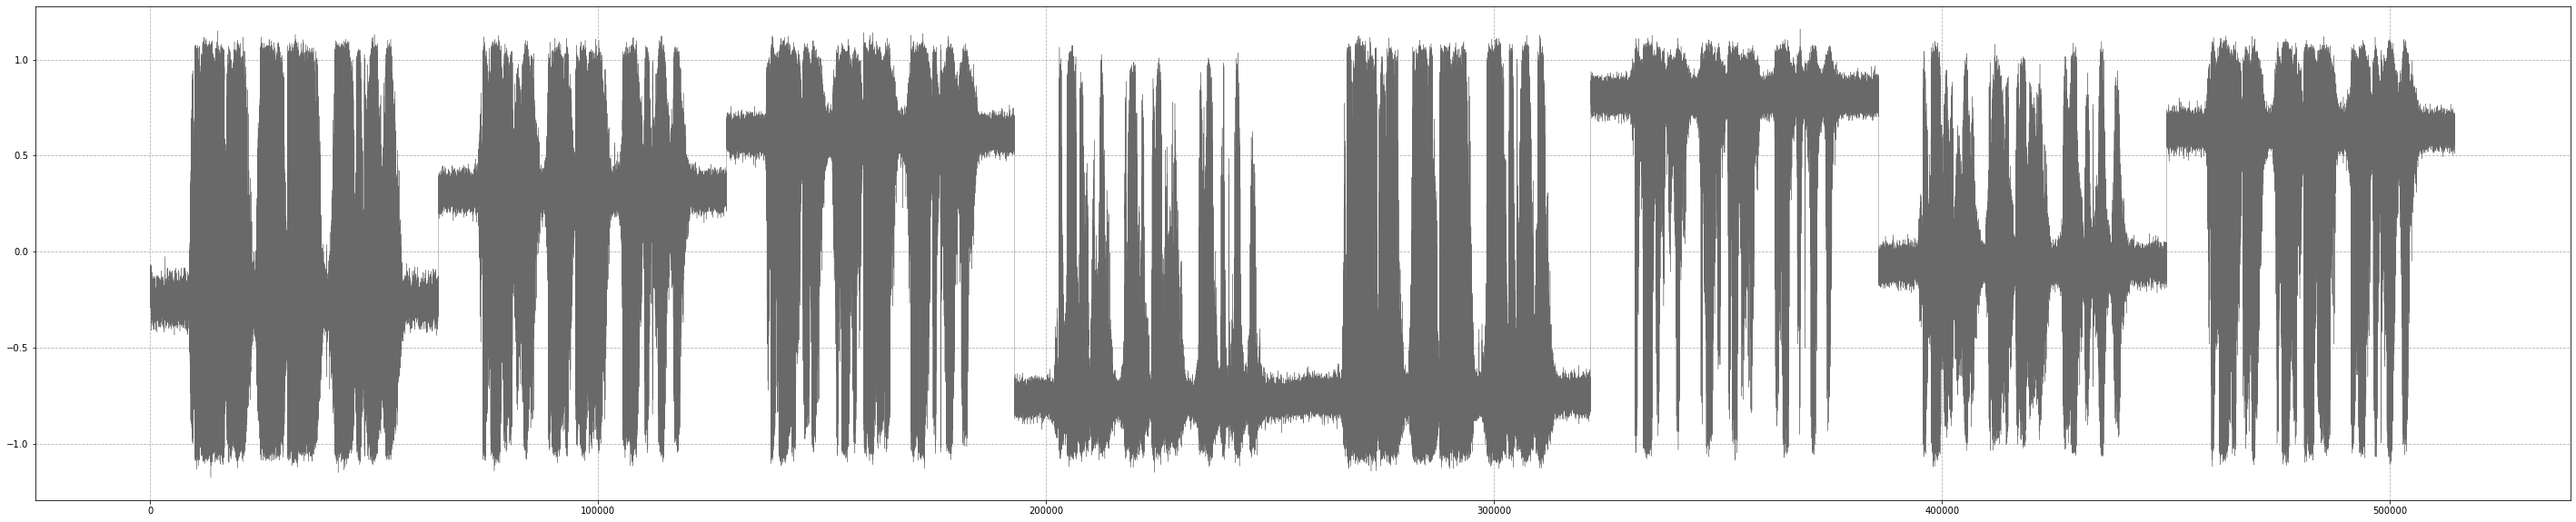

In [153]:
plot_curve((Y.view(-1)).detach().numpy())# original output

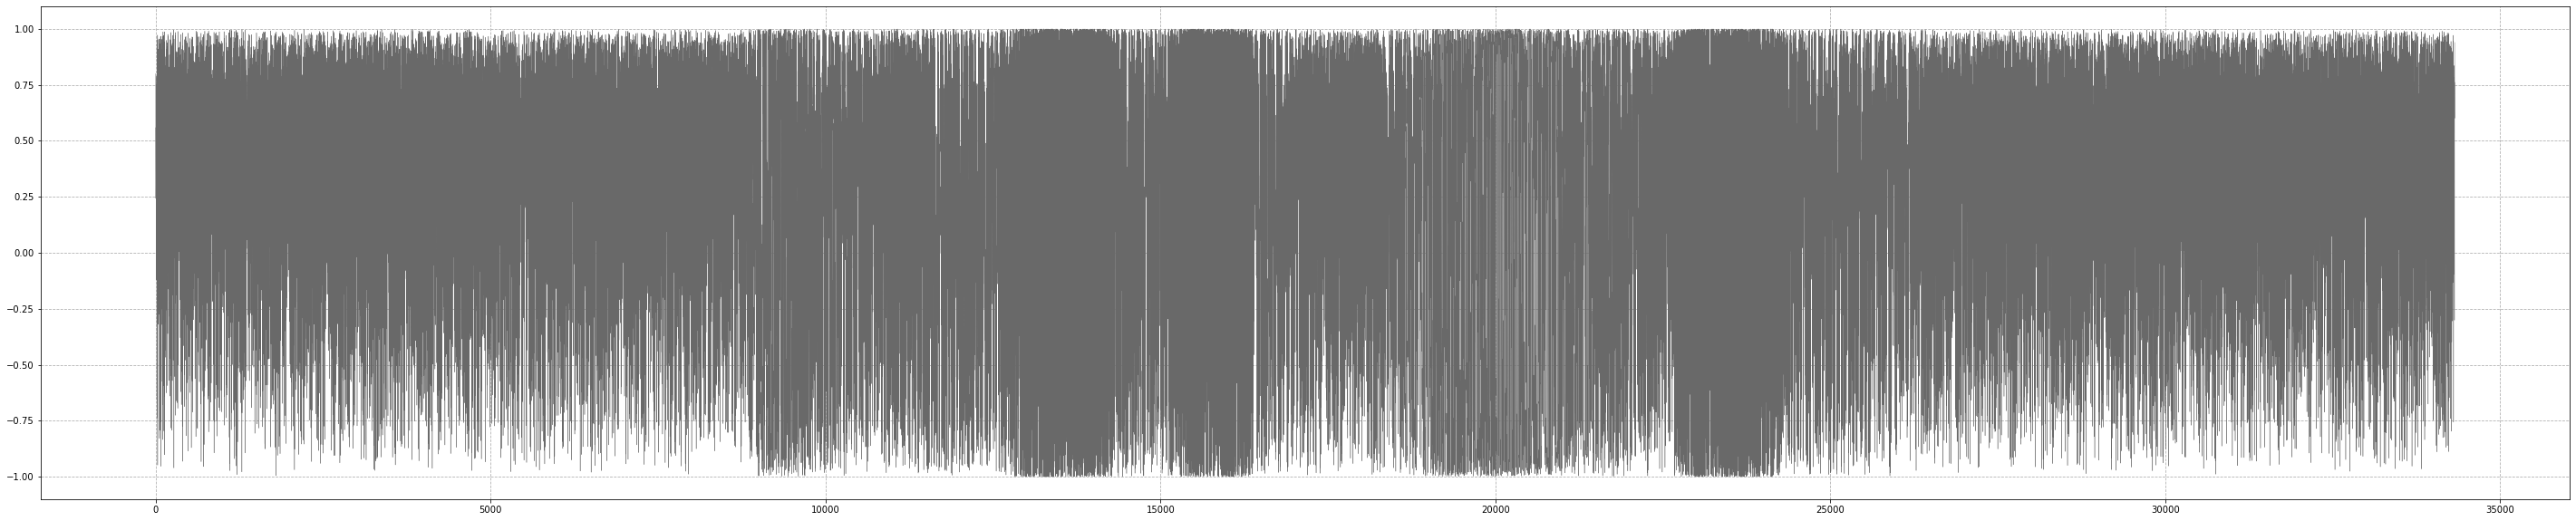

In [211]:
plot_curve(((x_).view(-1)).detach().numpy())    # original output

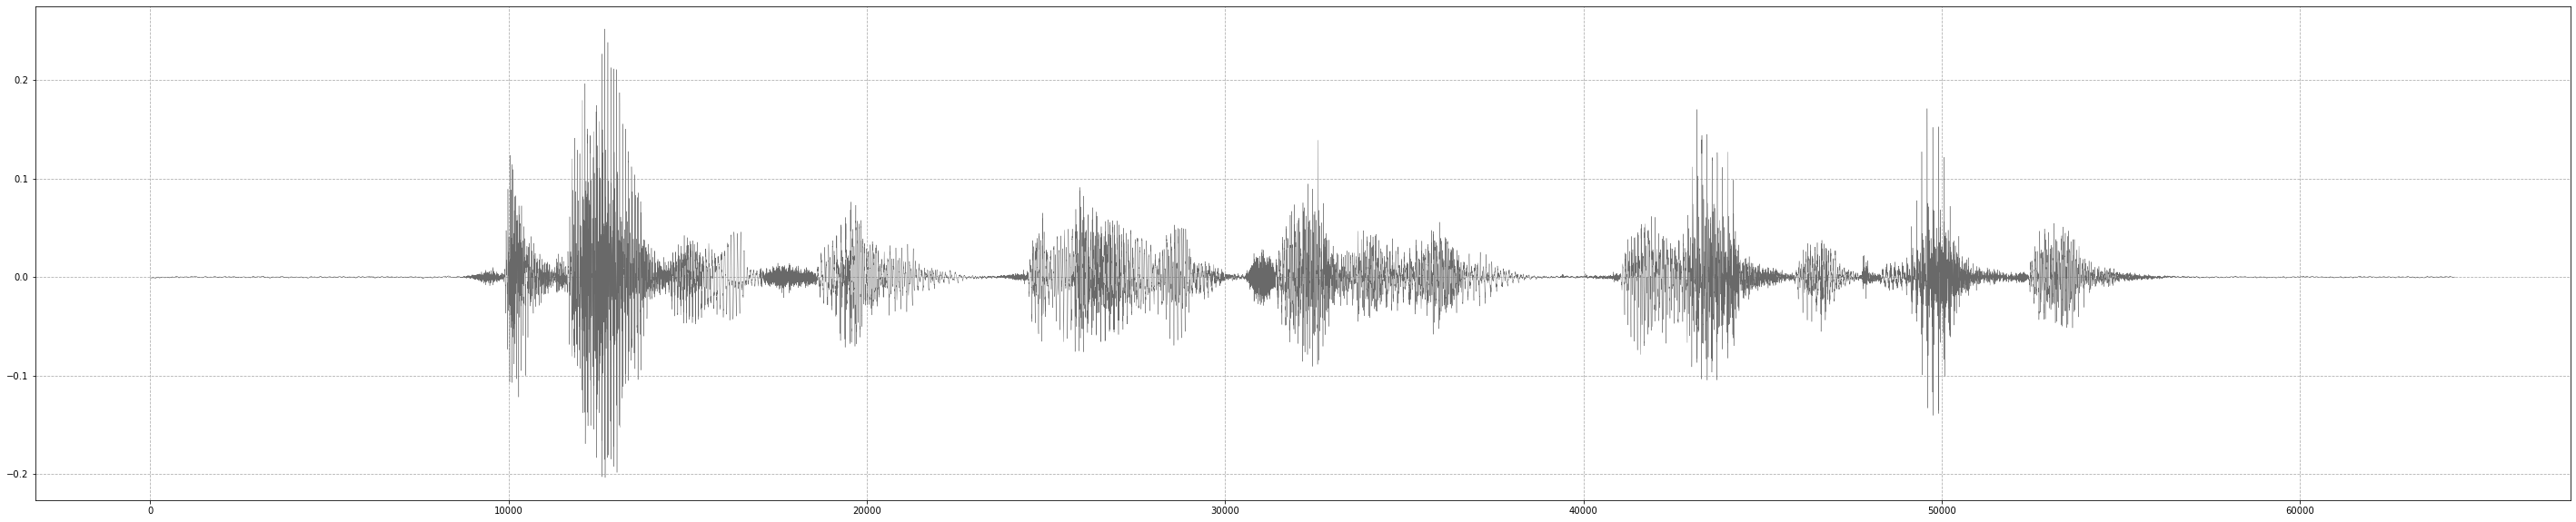

In [164]:
plot_curve(((source).view(-1)).detach().numpy())    # original output

In [74]:
fading = torch.randn(X.shape)
fading = fading * 0.1 + 0.8

In [75]:
fading.mean()


tensor(0.7998)

In [76]:
fading.std()

tensor(0.1001)

In [ ]:
mul(tensor)

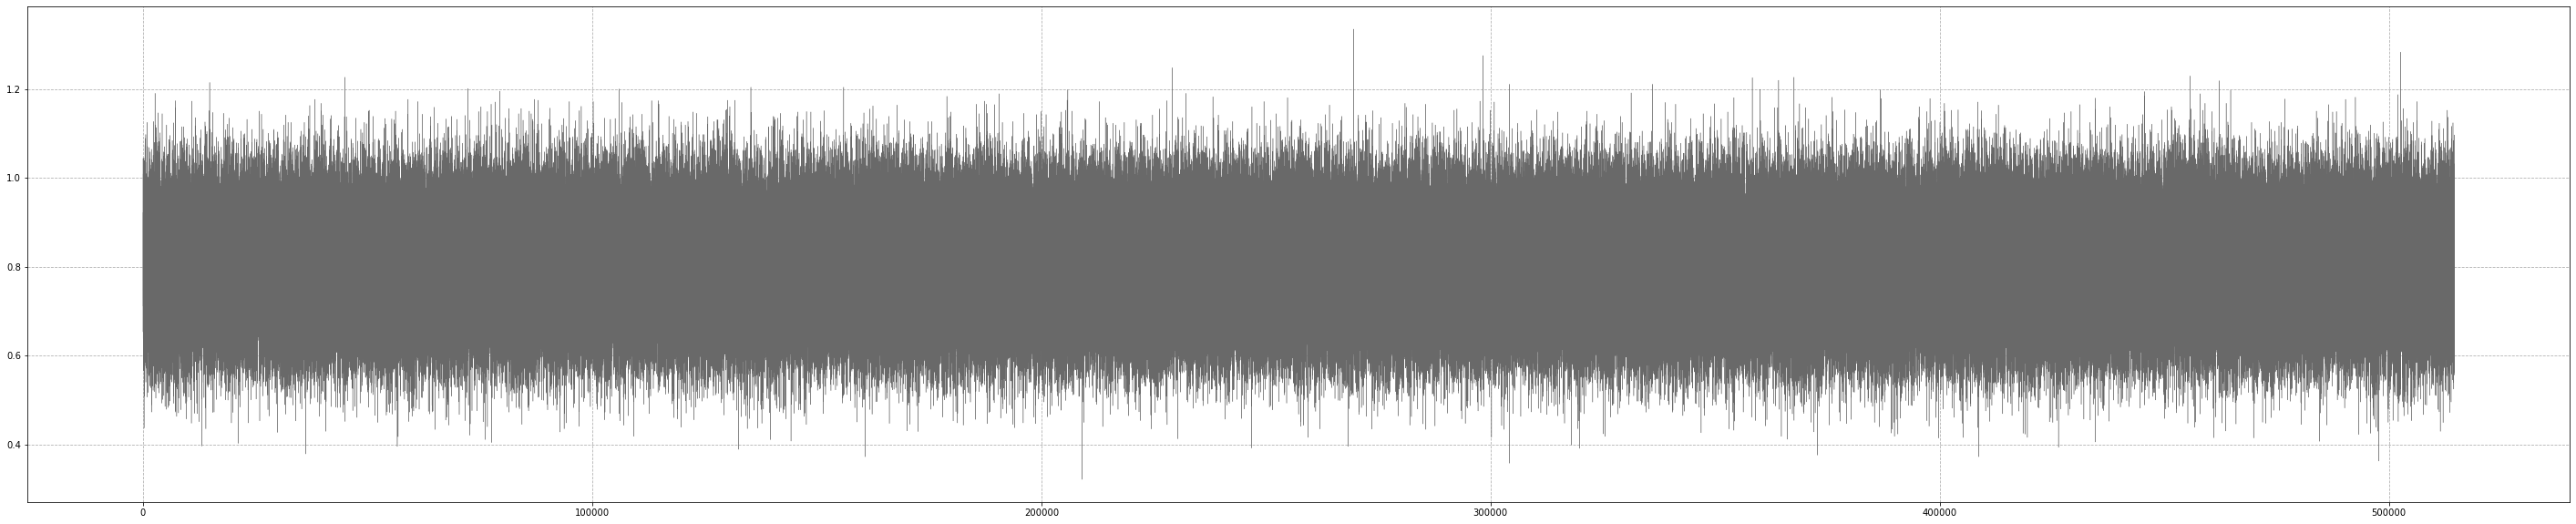

In [83]:
plot_curve((fading.view(-1)).detach().numpy())# original output

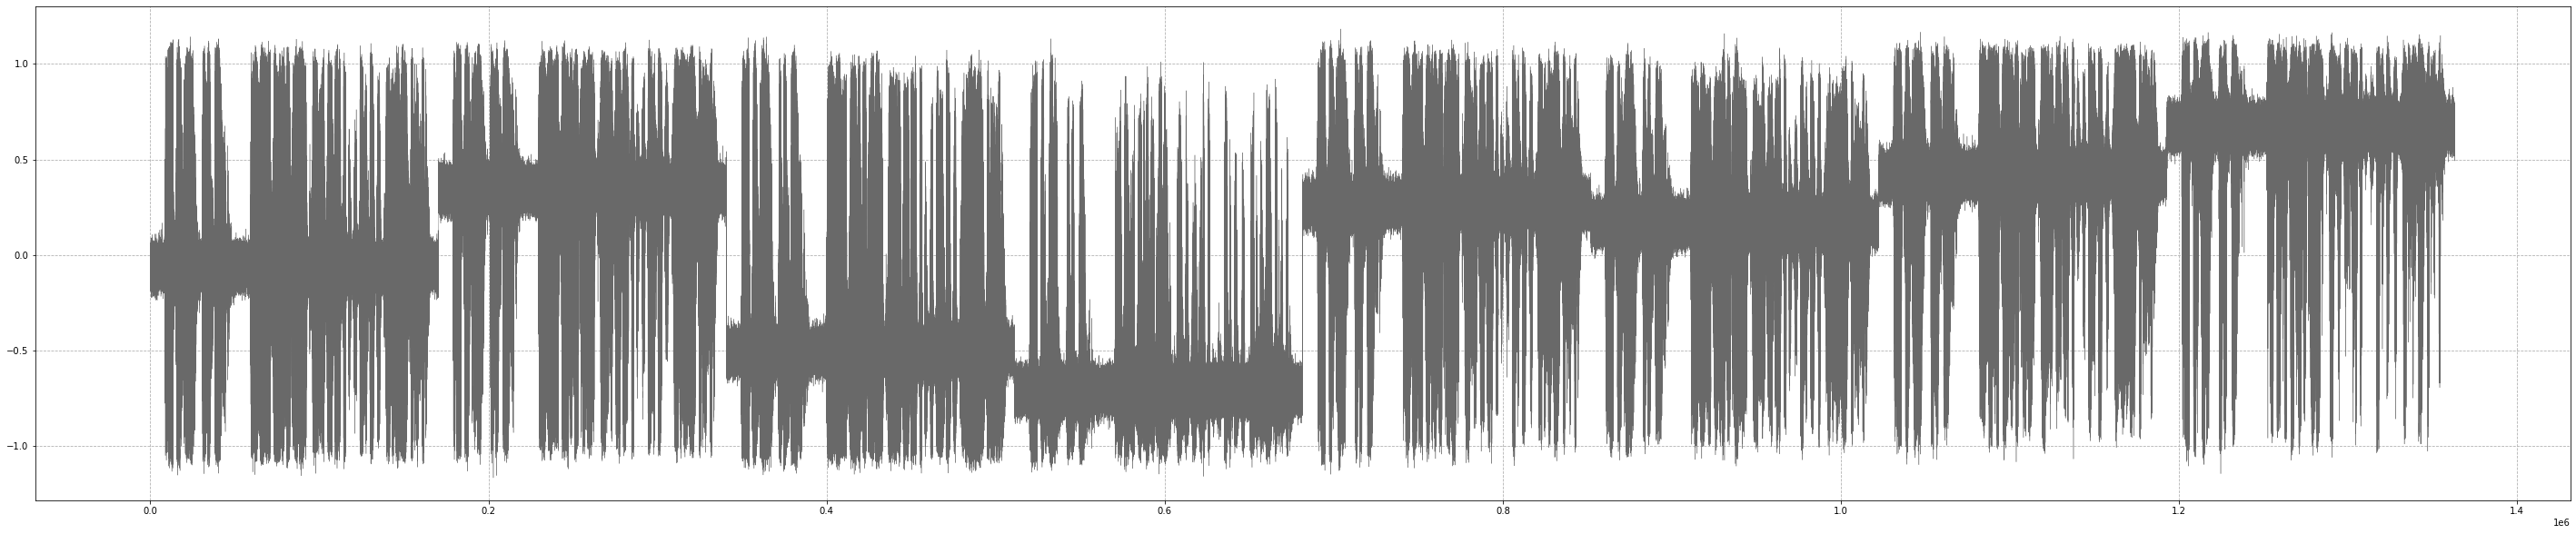

In [19]:
plot_curve((Y.view(-1)).detach().numpy())# original output

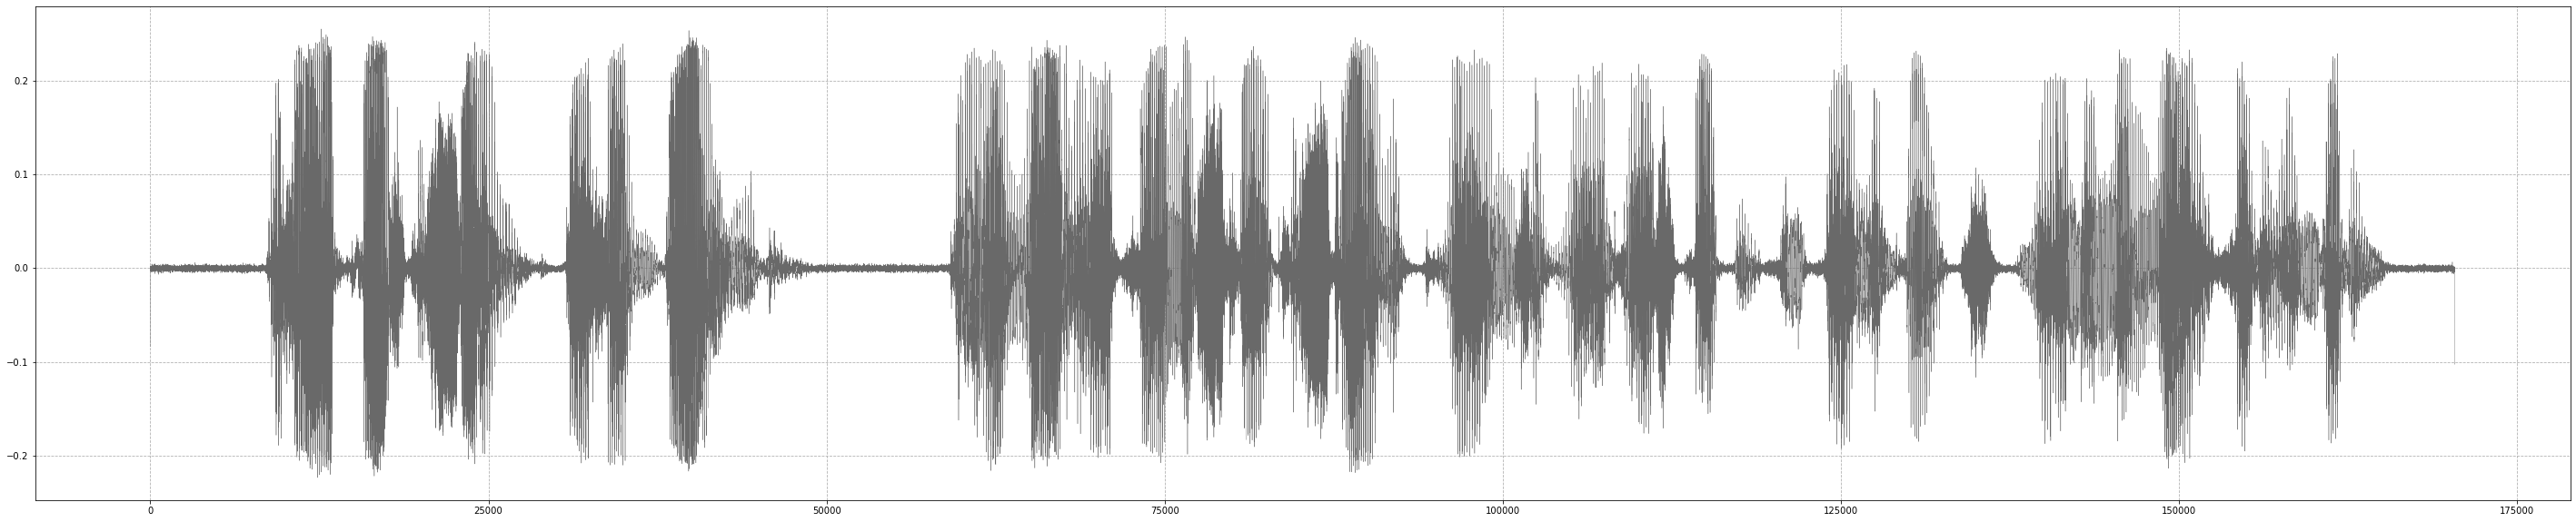

In [27]:
plot_curve((x_.view(-1)).detach().numpy())    # original output

### Distributed GD


In [739]:

cp_d = torch.load('./w2v_thn/FL_AutoEncoder/0801_tdiv1_feat8_6dB_NR_10eFL1/checkpoint_best.pt')

model_d = Wav2VecAutoEncoderModel.build_model(cp_d['cfg']['model'], task=None)
model_d.load_state_dict(cp_d['model'])
# model.eval()


<All keys matched successfully>

In [734]:
res = []
for i in range(20):
    # Encoder, Transmitter 
    source_ = source 
    T_a = model_d.feature_extractor_en(source_)
    T_a_ = model_d.dropout_feats_en(T_a)
    print("|*****T_a_S:|", T_a_.shape)
    X = model_d.feature_aggregator_en(T_a_)
    X = model_d.dropout_agg_en(X)
    print("|*******X_S:|", X.shape)

    # Channel layer

    import math
    import numpy as np
    SNR = 14 # dB # SNR = 10 log（s/n） = 6
    P_noise = 0.2 /math.sqrt(10**(SNR/10))
    P_noise = torch.tensor(P_noise).half()
    # [r1,r2,r3] = X.shape 
    # noise = np.random.randn(r1,r2,r3)
    noise = torch.randn(X.shape).half()

    # fading = torch.randn(X.shape).half()
    # fading = fading * 0.1 + 0.8


    # print(X.type(), torch.from_numpy(noise).float().cuda().type(), P_noise.type())
    # Y = X + torch.from_numpy(noise).half().cuda() * P_noise.cuda()

    # Y = fading.mul(X) + noise * P_noise
    Y = 0.8 * (X + noise * P_noise)


    # —————————— No Noise Channel ————————-
    # Y  = X

    # ——————————  Decoder, Receiver ———————
    print("In the Channel Y_S", Y.shape)
    features = model_d.feature_aggregator(Y)
    # x = self.dropout_agg(feature)

    features_ = model_d.dropout_agg(features)
    x = model_d.feature_extractor(features_)
    print("|in decoder model_d, out feature_extractor|", x.shape)
    x_ = model_d.dropout_feats(x)
    # x_ = x_ - 1
    res.append(MSE(x_ , source_))


|*****T_a_S:| torch.Size([1, 8, 64316])
|*******X_S:| torch.Size([1, 8, 64316])
In the Channel Y_S torch.Size([1, 8, 64316])
|in decoder model_d, out feature_extractor| torch.Size([1, 1, 64320])
output, source, minlen= 64320 64320 64320
2.22301605e-04
|*****T_a_S:| torch.Size([1, 8, 64316])
|*******X_S:| torch.Size([1, 8, 64316])
In the Channel Y_S torch.Size([1, 8, 64316])
|in decoder model_d, out feature_extractor| torch.Size([1, 1, 64320])
output, source, minlen= 64320 64320 64320
2.21848139e-04
|*****T_a_S:| torch.Size([1, 8, 64316])
|*******X_S:| torch.Size([1, 8, 64316])
In the Channel Y_S torch.Size([1, 8, 64316])
|in decoder model_d, out feature_extractor| torch.Size([1, 1, 64320])
output, source, minlen= 64320 64320 64320
2.22516814e-04
|*****T_a_S:| torch.Size([1, 8, 64316])
|*******X_S:| torch.Size([1, 8, 64316])
In the Channel Y_S torch.Size([1, 8, 64316])
|in decoder model_d, out feature_extractor| torch.Size([1, 1, 64320])
output, source, minlen= 64320 64320 64320
2.29627

In [736]:
sum = 0 
for j in res:
    sum += float(j)
average = sum / 20
print("%.8e"%average)

2.23492087e-04


In [612]:
# Distributed Learning
MSE(x_ , source_)

output, source, minlen= 64320 64320 64320
2.46234064e-04


'2.46234064e-04'

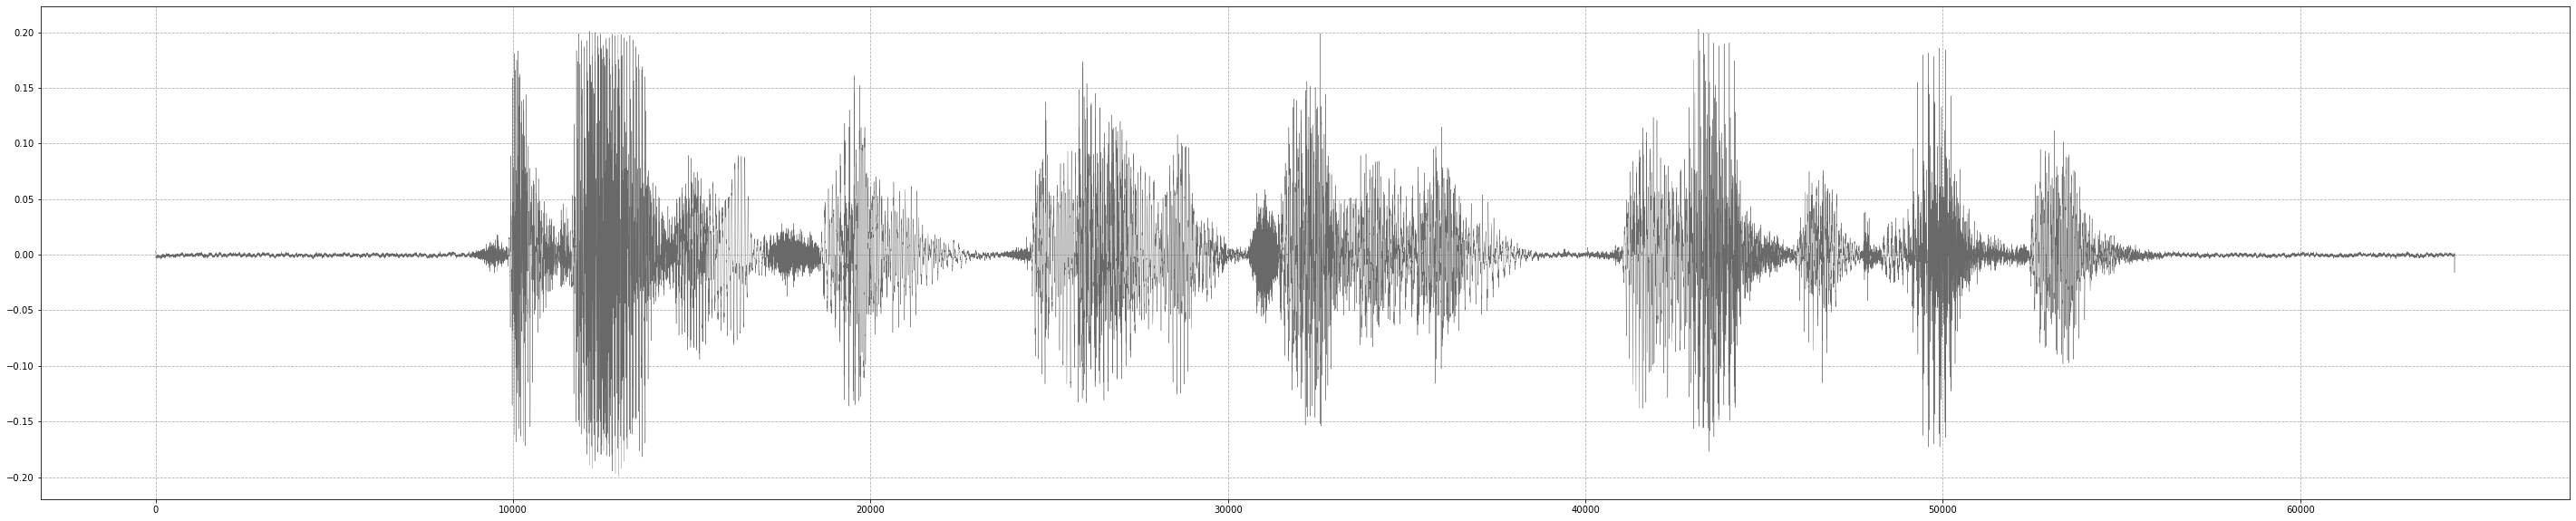

In [719]:
plot_curve(((x_ * 0.8 ).view(-1)).detach().numpy())    # original output

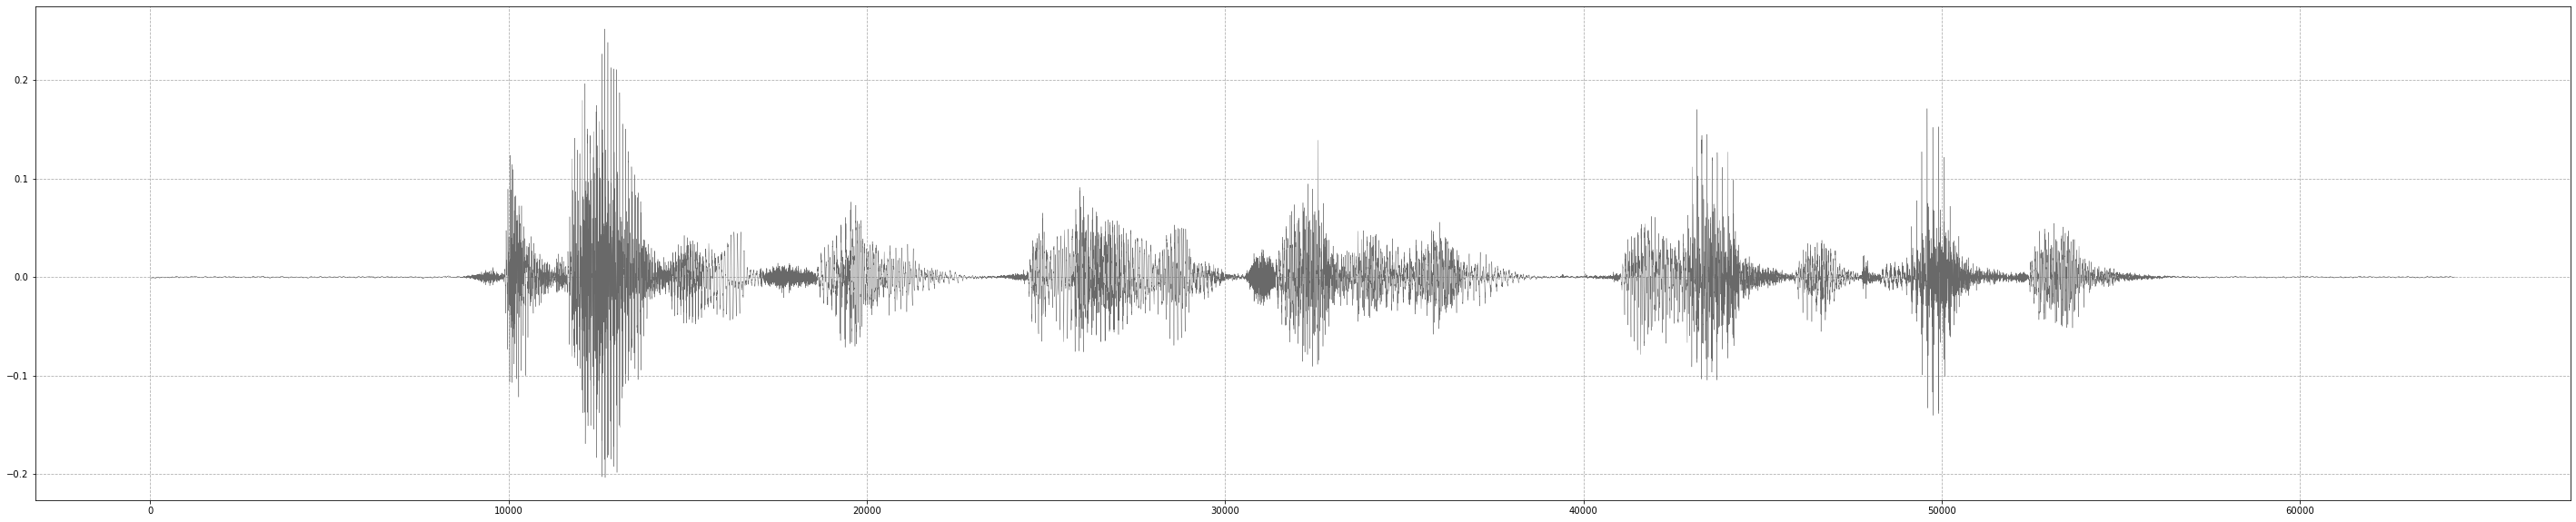

In [384]:
plot_curve(((source_).view(-1)).detach().numpy())    # original output

In [26]:
#  定义绘制一维向量的函数
def plot_curve(y: np.ndarray, i = 0, j = 0) -> None:
    import matplotlib.pyplot as plt
    import matplotlib
    x = np.arange(0,len(y))
    if j == 0: 
        j = len(y)      
    # i = 10000
    # l = 50000
    plt.figure(1)
    plt.plot(x[i: i + j], y[i: i + j],'k',color='#696969', linewidth=0.4, linestyle="-") 
    plt.rcParams['figure.figsize'] = (50.0, 10.0) # 设置figure_size尺寸
    plt.grid(ls='--')#标尺，on：有，off:无。
#     plt.savefig('fig_source.eps', dpi=600, format='eps')
#     plt.savefig('fig_source.png')
    plt.show() #展示绘图


In [39]:
def MSE(output: torch.tensor, source: torch.tensor):
    import torch 
    loss_func = torch.nn.MSELoss(reduce=True, size_average=True)
    output, source = output.view(-1), source.view(-1)
    min_len = min(len(output), len(source))
    print("output, source, minlen=", len(output), len(source), min_len)
    loss = loss_func(output[:min_len], source[:min_len]) #/ source.mul(source).mean() # MSE
    print("%.8e"%loss)
    return "%.8e"%loss
    

In [222]:
def NRMSE(output: torch.tensor, source: torch.tensor):
    import torch 
    loss_func = torch.nn.MSELoss(reduce=True, size_average=True)
    output, source = output.view(-1), source.view(-1)
    min_len = min(len(output), len(source))
    print("output, source, minlen=", len(output), len(source), min_len)
    loss = loss_func(output[:min_len], source[:min_len]) / source.mul(source).mean() # NRMSE
    print("%.8f"%loss)
    return "%.8f"%loss
    